# HR ANALYTICS: PREDICTING EMPLOYEE PROMOTIONS

![Employee Prediction](./Images/Employee_Prediction.png)

# Project Summary

This project aims to predict employee eligibility for promotion within a large multinational corporation (MNC) by analyzing a dataset containing demographic details, performance metrics, training records, and past promotions. The business goal is to help HR teams streamline promotion cycles by identifying employees most likely to be eligible for promotion. However, the target column in the dataset is severely imbalanced, with very few employees being promoted, which poses a significant challenge for model performance, especially in terms of achieving a high F1 score.

Data preparation involved cleaning the dataset, addressing missing values, encoding categorical variables, and performing feature engineering. Techniques such as SMOTE were applied to balance the dataset during training. Additionally, feature importance analysis identified key factors influencing promotion eligibility, assisting HR professionals in understanding the primary predictors of promotion.Various machine learning models, including Logistic Regression, Decision Trees, Random Forest, and XGBoost, were tested to predict promotion eligibility. Hyperparameter tuning was conducted using GridSearchCV to optimize the models. 

After evaluating the models using accuracy, precision, recall, and F1 score, the XGBoost model emerged as the best performer, achieving an F1 score of 0.487. This model offered a reasonable balance between precision and recall, providing valuable insights into the primary factors that influence promotion eligibility. Despite the challenges posed by the imbalanced dataset, the XGBoost model can still assist HR professionals in making data-driven decisions and streamlining the promotion process. Future improvements could focus on addressing the imbalance further to enhance model performance.

# Business Understanding
Our client, a large MNC, operates across 9 broad organizational verticals. A primary challenge they face is identifying high-potential candidates for promotion in a timely manner. Currently, employees are recommended for promotion based on past performance and are required to complete training and evaluation programs specific to each vertical. Employees who achieve at least 60% KPI completion are considered for promotion, but final decisions are only made after all evaluations are completed, delaying the promotion cycle.

The goal is to help HR departments proactively identify employees eligible for promotion at a specific checkpoint, enabling a faster, data-driven promotion cycle.

# Problem Statement
The current promotion process for managerial positions and below is manual, time-consuming, and perceived as biased, with concerns about favoritism affecting advancement opportunities. To improve fairness and efficiency, the HR department aims to implement a predictive model that uses demographic and performance data to assess promotion eligibility objectively. This model will help streamline promotions, reduce subjectivity, and support data-driven decision-making, enabling timely and equitable identification of high-potential candidates.

# Objectives

## Main Objective

The main objective of this project is to increase the effectiveness and precision of the promotion process for HR professionals, by developing a model that uses historical data to forecast which workers are most likely to be promoted.

## Key Business Questions
1. Which employees are most likely to be promoted in the next cycle?
2. What are the most significant factors influencing promotions within the organization?
3. Is there any observable bias in promotion decisions that needs to be addressed?
4. How can training programs be optimized to increase the likelihood of promotion?
5. What impact does promotion likelihood have on employee retention?

## Stakeholders
1. **HR Department** - These are the primary users of the promotion prediction model.
2. **Department Heads and Team Managers** - Managers would benefit from the insights to understand the promotion potential within their teams, support employee development, and make informed recommendations based on data.
3. **Executive Leadership** - The findings of this study will inform strategic decisions on talent retention, workforce planning, and to align promotion processes with organizational goals.
4. **Data Science/IT Team** - Responsible for managing the model deployment, updates, and integration with existing HR systems, ensuring data privacy and compliance throughout the project.

# Data Understanding

The [dataset](https://www.analyticsvidhya.com/datahack/contest/wns-analytics-hackathon-2018-1) used for this project was sourced from an ongoing hackathon hosted on Analytics Vidhya website. It comprises of 54,808 observations of 14 variables.

It is further divided into two datasets:
- **Train Dataset**: Used for building the model. Contains information on current employees, their demographics, performance, and target labels indicating if they were promoted.
- **test Dataset**: Used for model evaluation. Contains similar features but without the target labels.

The dataset provides comprehensive information about each employee's demographic profile, employment background, performance indicators, and training outcomes. Each record represents an employee and includes the following key features:

- **employee_id**: A unique identifier for each employee.
- **department**: The department to which the employee belongs, indicating their area of expertise.
- **region**: The geographical location of the employee’s role, represented as an unordered categorical variable.
- **education**: The highest level of education attained by the employee, which may influence role-specific skills and promotion potential.
- **gender**: The gender of the employee, providing insights into diversity in promotion patterns.
- **recruitment_channel**: The method by which the employee was recruited, indicating initial access channels.
- **no_of_trainings**: The number of training programs completed by the employee in the previous year, covering technical and soft skills.
- **age**: The employee’s age, which may correlate with experience and readiness for promotion.
- **previous_year_rating**: The performance rating assigned to the employee for the prior year.
- **length_of_service**: The number of years the employee has been with the organization, reflecting organizational experience.
- **KPIs_met >80%**: A binary indicator of whether the employee met over 80% of their Key Performance Indicators (KPIs) in the past year.
- **awards_won?**: A binary indicator showing if the employee received any awards in the previous year, which may highlight recognition of outstanding performance.
- **avg_training_score**: The average score achieved by the employee in recent training evaluations, which reflects skill development and training outcomes.
- **is_promoted**: The target variable indicating if the employee was recommended for promotion (1) or not (0).

Understanding these variables is crucial as they are the basis for training a model to predict promotion eligibility. By analyzing patterns in demographic and performance-related data, we aim to identify the factors most strongly associated with promotion, facilitating more objective and efficient promotion decisions.

# Metric Success

The **F1 score** is the chosen evaluation metric of success, as it emphasizes a balanced approach between identifying actual promotions (recall) and minimizing incorrect promotion predictions (precision).

This project pushes towards an **F1-Score of 0.70** as this would reflect a model that is both specific and sensitive.

# Data Exploration

## Importing the libraries

In [1]:
#Importing the necessary classes, functions, and packages needed.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
import xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Scipy imports
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# Imbalanced-learn imports
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# IPython display
from IPython.display import Markdown, display

# Warning filter
import warnings
warnings.filterwarnings('ignore')

# Inline plotting
%matplotlib inline



**Loading the Dataset**

In [2]:
#Importing the provided train and test data

train = pd.read_csv("Data/train.csv")
validation_df = pd.read_csv("Data/test.csv")

print (f"train_data = {train.shape}")
print (f"validation_df_data = {validation_df.shape}")

train_data = (54808, 14)
validation_df_data = (23490, 13)


**Dataset Overview**

The project utilizes two datasets:

- *Training Data:* The train_data dataset contains *54,808* records and *14* columns. This dataset includes demographic, performance, and target information about employees, allowing the model to learn patterns associated with promotion eligibility.
  
- *validation_df Data:* The validation_df_data dataset comprises *23,490* records and *13* columns. This dataset includes similar features to the training data but excludes the target variable (is_promoted), enabling us to evaluate the model's predictions on unseen data.

The difference in column count is due to the absence of the target variable in the validation_dfing data.

**Understanding the data**

In [3]:
# Preview of the first 5 rows
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
validation_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Checking Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Missing values are present in the *education* and *previous_year_rating* columns. The dataset consists of *8 integer columns, **5 categorical columns, and **1 float column*.

In [6]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Missing values are present in the *education* and *previous_year_rating* columns. The dataset consists of *7 integer columns, **5 categorical columns, and **1 float column*.

In [7]:
# Checking the Summary Statistics
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Summary Statistics Analysis (Train Dataset)

- **Number of Trainings (`no_of_trainings`)**: 
  - Most employees have only 1 training, as indicated by the median and the interquartile range (25th to 75th percentiles).
  - Some employees have undergone up to 10 trainings.

- **Age**: 
  - The average age of employees is approximately 34.8 years.
  - Ages range from 20 to 60, suggesting a wide distribution.

- **Previous Year Rating**: 
  - Ratings range from 1 to 5, with an average rating of around 3.3.

- **Length of Service**: 
  - Average length of service is about 5.87 years, with a maximum of 37 years.
  - Indicates a broad range in employee tenure.

- **KPIs Met > 80%**: 
  - Around 35.2% of employees met more than 80% of their Key Performance Indicators (KPIs).

- **Awards Won**: 
  - Only a small percentage of employees (around 2.3%) have won awards, indicating awards are rare.

- **Average Training Score**: 
  - Employees have an average training score of 63.39, with scores ranging from 39 to 99.
  - This suggests variability in training performance.

- **Is Promoted**: 
  - The target variable, indicating whether an employee was promoted.
  - With a mean of approximately 0.085, around 8.5% of employees received promotions, showing a class imbalance.


In [8]:
validation_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


### Summary Statistics Analysis (validation_df Set)

- **Number of Trainings (`no_of_trainings`)**: 
  - Most employees have only 1 training, as indicated by the median and the interquartile range (25th to 75th percentiles).
  - A few employees have up to 9 trainings.

- **Age**: 
  - The average age of employees is approximately 34.8 years.
  - Ages range from 20 to 60, indicating a broad age distribution.

- **Previous Year Rating**: 
  - Ratings range from 1 to 5, with an average rating around 3.3.

- **Length of Service**: 
  - The average length of service is about 5.81 years, with a maximum of 34 years.
  - This suggests varying levels of employee tenure.

- **KPIs Met > 80%**: 
  - Around 35.9% of employees met more than 80% of their Key Performance Indicators (KPIs).

- **Awards Won**: 
  - Only a small percentage of employees (around 2.3%) have won awards, showing that awards are rare.

- **Average Training Score**: 
  - Employees have an average training score of 63.26, with scores ranging from 39 to 99.
  - This indicates a wide range of training performance.


### Initial Observations and Data Quality
- **Missing Values**: The `previous_year_rating` and `education` features has some missing values.
- **Outliers**: The `length_of_service` has a few extreme values, possibly representing long-tenured employees.
- **Class Imbalance**: The target variable `is_promoted` may be imbalanced, which could impact model performance.

These observations guide our data cleaning and preprocessing steps.

# Data Cleaning

**Checking for Duplicates**

In [9]:
# Checking for duplicates based on the employee_id column
train.duplicated(['employee_id']).sum()

0

There are no duplicate employee_id values. This indicates that each employee in the training dataset has a unique identifier, ensuring data integrity for this key field.

In [10]:
validation_df.duplicated(['employee_id']).sum()

0

There are no duplicate employee_id values. This indicates that each employee in the testing dataset has a unique identifier, ensuring data integrity for this key field.

**Handling Missing Values**

In [11]:
# Checking for Null values
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nvalidation_df Dataset - Missing and Unique Values")
print(missing_and_unique_values(validation_df))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          54808
department                         0              9
region                             0             34
education                       2409              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating            4124              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

validation_df Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          23490
department             

- *Train Dataset:* Out of 54,808 entries, the *education* column has 2,409 missing values, and *previous_year_rating* has 4,124 missing values. The target variable *is_promoted* has 2 unique values, indicating promotion status.
- *validation_df Dataset:* Out of 23,490 entries, *education* has 1,034 missing values, and *previous_year_rating* has 1,812 missing values.

In [12]:
# drop values that are null
train.dropna(axis=0,inplace=True)
validation_df.dropna(axis=0, inplace=True)

In [13]:
# Confirm Null values dropped
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nvalidation_df Dataset - Missing and Unique Values")
print(missing_and_unique_values(validation_df))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          48660
department                         0              9
region                             0             34
education                          0              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating               0              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

validation_df Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          20819
department             

**Checking for Outliers**

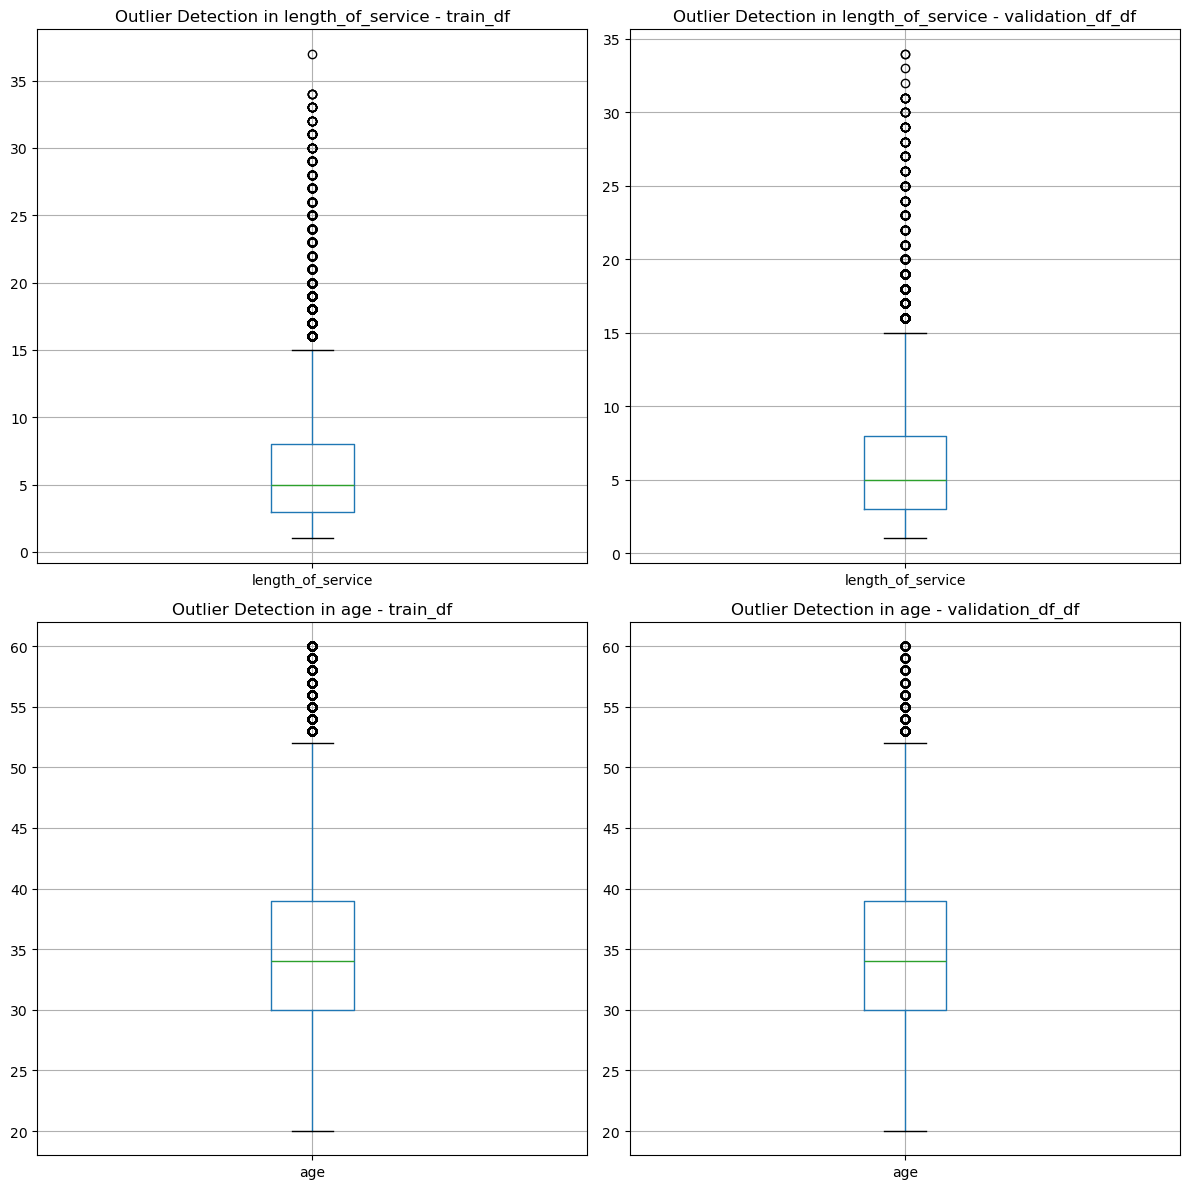

In [14]:
# Checking for Outliers in 'length_of_service' and 'age' columns
# Plot box plots to visualize outliers in the datasets
dataframes = [('train_df', train), ('validation_df_df', validation_df)]

# Plot side-by-side boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Loop through dataframes and columns to plot boxplots
for i, (name, df) in enumerate(dataframes):
    # Plot 'length_of_service' boxplot
    df[['length_of_service']].boxplot(ax=axes[0, i])
    axes[0, i].set_title(f'Outlier Detection in length_of_service - {name}')

    # Plot 'age' boxplot
    df[['age']].boxplot(ax=axes[1, i])
    axes[1, i].set_title(f'Outlier Detection in age - {name}')

plt.tight_layout()
plt.show()

**Outliers in Age and Length of Service**

Outliers are present in the `age` and `length_of_service` columns, but they represent plausible values within the employee data context. For example, an age up to 60 and long tenures up to 34 years are realistic and reflect meaningful variability in employee demographics. Removing these values would discard valuable information, so we retain them for a more comprehensive analysis.


**Region Column - Cleaning and Grouping**

In [15]:
#Checking the count of unique values in the region column
train.region.value_counts()

region
region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: count, dtype: int64

The original `region` column contains many unique values, which could add unnecessary complexity to the model. Grouping less common regions as "Other" helps simplify this feature, making it more interpretable and reducing noise. This can allow the model to identify promotion trends related to major regions without overfitting to sparse regions.

In [16]:
# Defining the threshold for grouping into "Other"
threshold = 1000

# Identifying regions that meet the threshold criteria in the train dataset
common_regions = train['region'].value_counts()
common_regions = common_regions[common_regions >= threshold].index

# Using np.where to assign regions based on the threshold for both train and validation_df datasets
train['region_cleaned'] = np.where(train['region'].isin(common_regions), train['region'], 'Other')
validation_df['region_cleaned'] = np.where(validation_df['region'].isin(common_regions), validation_df['region'], 'Other')

In [17]:
#Checking the number of unique values in the cleaned region column
train.region_cleaned.nunique()

14

In [18]:
validation_df.region_cleaned.nunique()

14

# Exploratory Data Analysis

EDA uses visualizations and correlation analyses to explore distributions and relationships among features, identifying trends that influence promotion, such as `previous_year_rating` and `avg_training_score`. This analysis informs feature engineering and data cleaning steps.

## a). Univariate Analysis

**Distribution of Categorical Features**

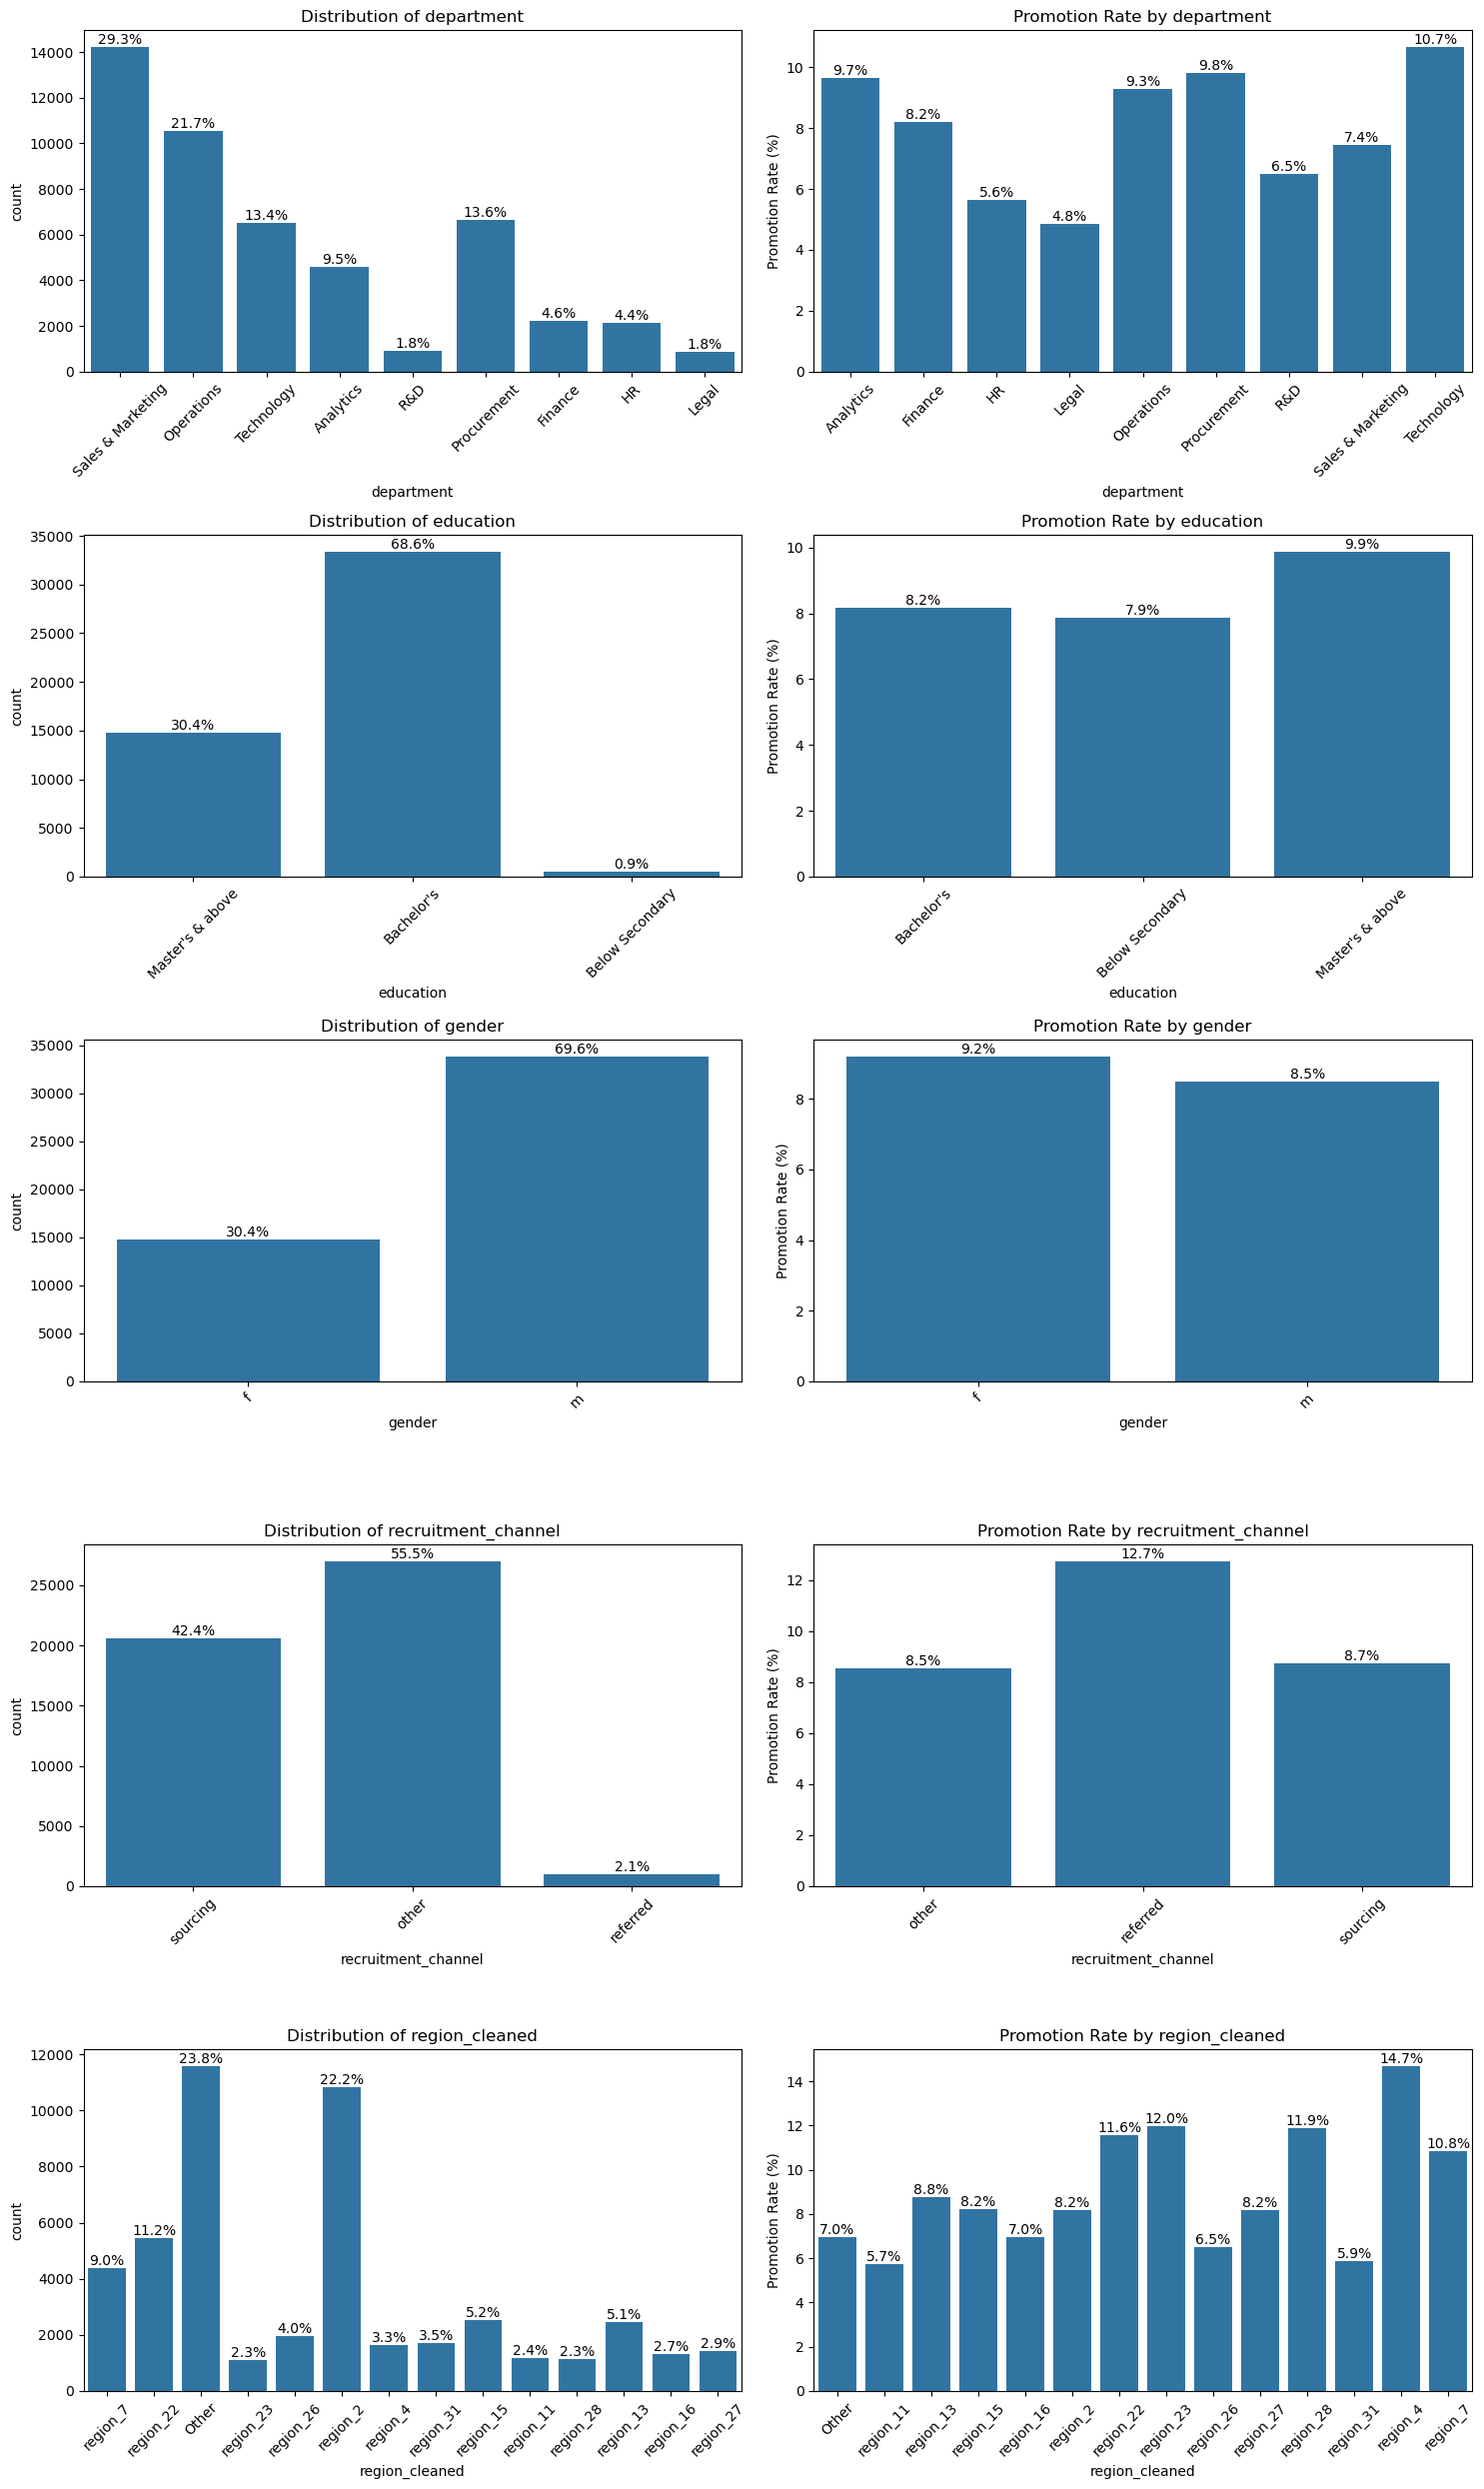

In [19]:
def plot_categorical_distributions(train, columns, target='is_promoted'):
    plt.figure(figsize=(15, len(columns) * 5))
    
    for idx, col in enumerate(columns, 1):
        # Plot distribution of the categorical feature
        plt.subplot(len(columns), 2, 2 * idx - 1)
        ax1 = sns.countplot(data=train, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars
        total = len(train)
        for p in ax1.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax1.annotate(percentage, (x, y), ha='center', va='bottom')

        # Plot promotion rate by category
        plt.subplot(len(columns), 2, 2 * idx)
        promotion_rate = train.groupby(col)[target].mean() * 100
        ax2 = sns.barplot(x=promotion_rate.index, y=promotion_rate.values)
        plt.title(f'Promotion Rate by {col}')
        plt.ylabel('Promotion Rate (%)')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars for promotion rate
        for p in ax2.patches:
            percentage = f'{p.get_height():.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax2.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Define categorical columns
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 
                   'region_cleaned']

# Call the function
plot_categorical_distributions(train, categorical_cols)

**Insights**

- **Distribution of Department**

The department distribution shows that Sales & Marketing is the largest department, comprising 29.3% of the workforce, followed by Operations at 21.7% and Technology at 13.4%. Promotion rates are highest in Technology (10.7%), with Procurement, Analytics, and Operations also showing strong promotion rates. In contrast, HR and Legal have lower promotion rates, suggesting areas for potential improvement.

- **Distribution of Education**

In terms of education, 68.6% of employees hold a Bachelor’s degree, while 30.4% have a Master’s degree or higher. Promotion rates increase with educational level, as employees with advanced degrees have a promotion rate of 9.9%, compared to 8.2% for Bachelor’s degree holders.

- **Gender Distribution**

The gender distribution shows a predominantly male workforce at 69.6%, with females comprising 30.4%. However, females have a slightly higher promotion rate at 9.2% compared to males, suggesting equitable advancement opportunities.

- **Recruitment Channel Distribution**

Recruitment channels are primarily led by “Other” methods (55.5%), followed by sourcing (42.4%), with referrals at 2.1%. Referred employees have the highest promotion rate at 12.7%, highlighting the effectiveness of referrals in bringing high-potential talent.

- **Region Distribution and Promotion Rate**

In the regional distribution, the “Other” category and region_22 have the highest employee counts, while region_4 leads in promotion rate at 14.7%. Other regions show varied advancement rates, indicating regional differences in promotion opportunities.


**Distribution of numeric columns and Promotion Status**

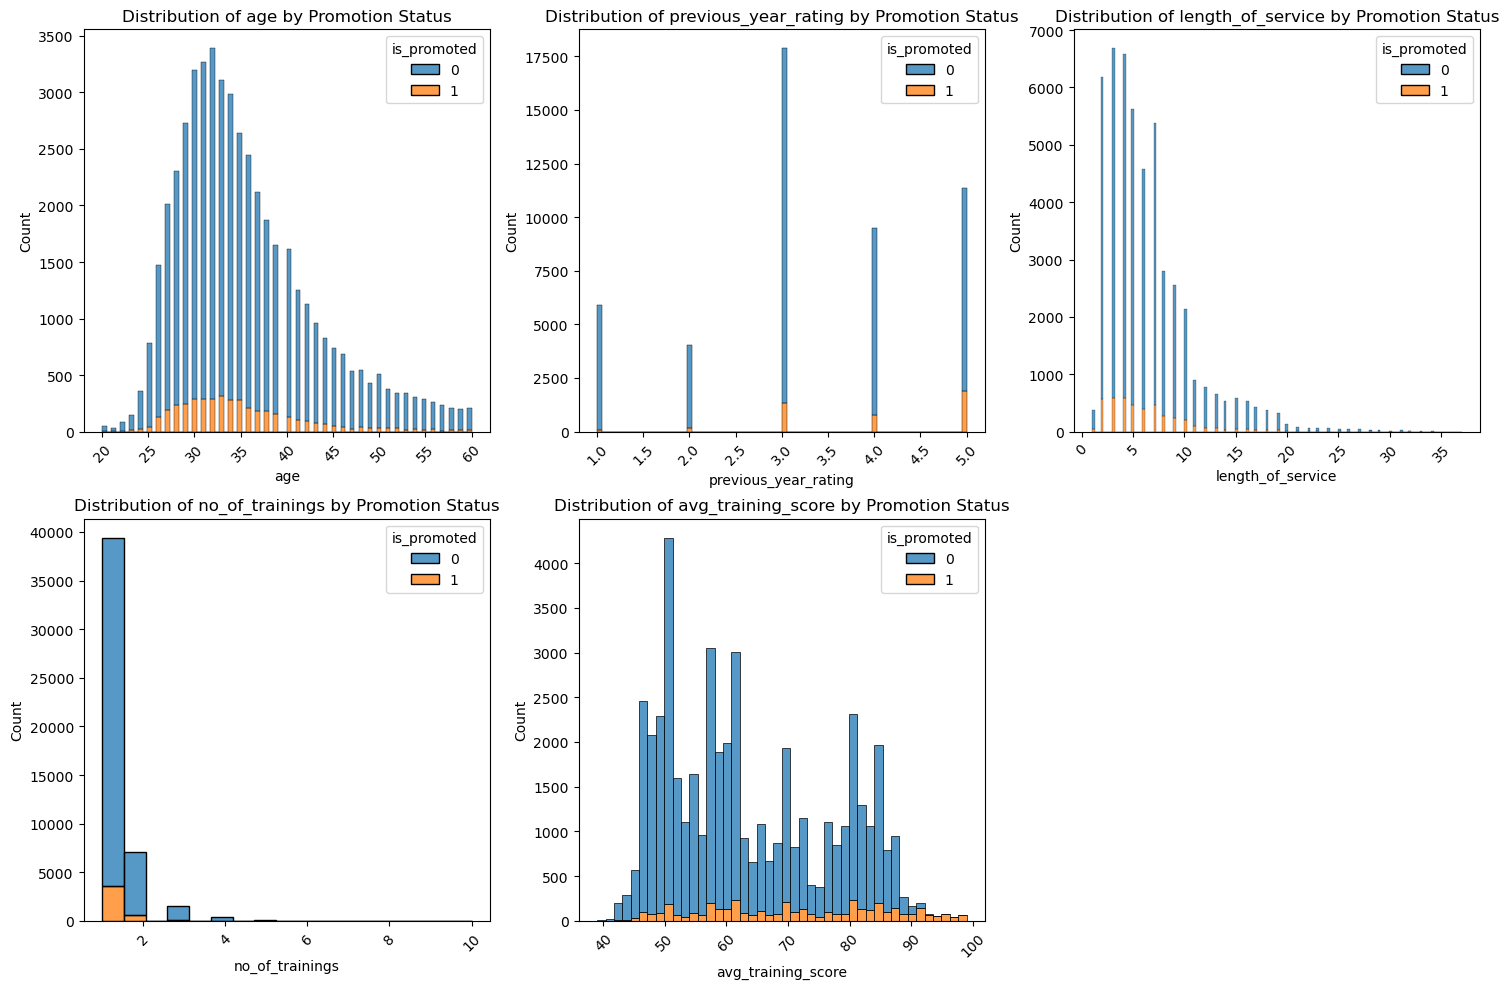

In [20]:
numerical_cols = ['age', 'previous_year_rating', 'length_of_service', 
                 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(data=train, x=col, hue='is_promoted', multiple="stack")
    plt.title(f'Distribution of {col} by Promotion Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**

1. **Age Distribution by Promotion Status**  
   Most employees are between 25 and 40, with a peak in the 30-35 range. Promotion rates are highest among employees aged 30-40, with fewer promotions for younger (<30) and older (>40) employees. The data may suggest a preference for promoting employees in their 30s, warranting a review to ensure age inclusivity in promotion practices.

2. **Previous Year Rating Distribution by Promotion Status**  
   Employee ratings are mostly concentrated around 3, with fewer at 1, 2, 4, and 5. Higher ratings (3, 4, and 5) correlate with more promotions, while lower ratings (1 and 2) see fewer promotions. This highlights the importance of performance ratings in promotion decisions and suggests that employees with lower ratings may benefit from support and training to boost promotion chances.

3. **Length of Service Distribution by Promotion Status**  
   Most employees have 0-10 years of service, with a drop-off for those over 10 years. Employees with 2-10 years see more promotions, while both new hires (<2 years) and long-term employees (>10 years) have fewer promotions. This suggests a mid-career advantage, with a need to create growth opportunities for long-term employees to encourage retention.

4. **Number of Trainings Distribution by Promotion Status**  
   Most employees have attended 1-2 trainings, and promotions are more common among those with 1-3 trainings. Those with over 3 trainings see fewer promotions, indicating that a moderate amount of training is linked to higher promotion rates. This suggests a need to assess the relevance of training for employees with multiple trainings to ensure it aligns with promotion goals.

5. **Average Training Score Distribution by Promotion Status**  
   Training scores are spread widely, with common scores around 50, 60, 70, and 80. Promotions are more frequent among those scoring 60-80, indicating that high performance in training correlates with promotion likelihood. High-quality, impactful training programs can help improve employee performance and advancement potential.

## b). Bivariate Analysis

**Relationship Between Age and Average Training Score**

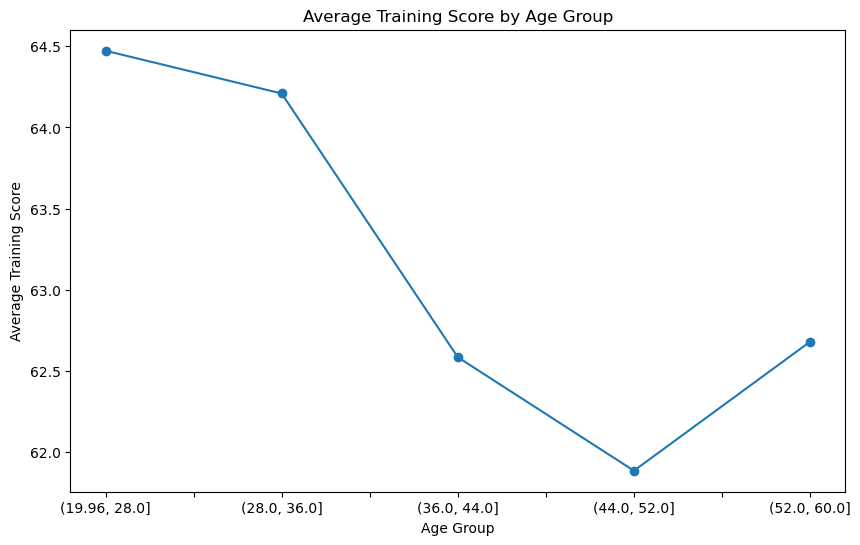

In [21]:
age_bins = pd.cut(train['age'], bins=5) 
avg_scores = train.groupby(age_bins)['avg_training_score'].mean()

plt.figure(figsize=(10, 6))
avg_scores.plot(kind='line', marker='o')
plt.title('Average Training Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Training Score')
plt.show()

The line plot shows that average training scores decline with age, with younger employees (20–36 years) scoring highest. Middle-aged groups (36–52 years) have the lowest scores, suggesting they may face challenges in training. The oldest group (52–60 years) shows a slight improvement in scores. This pattern indicates a potential need for age-inclusive training adjustments to support employees across different age groups.

**Training Score Comparison Across Departments**

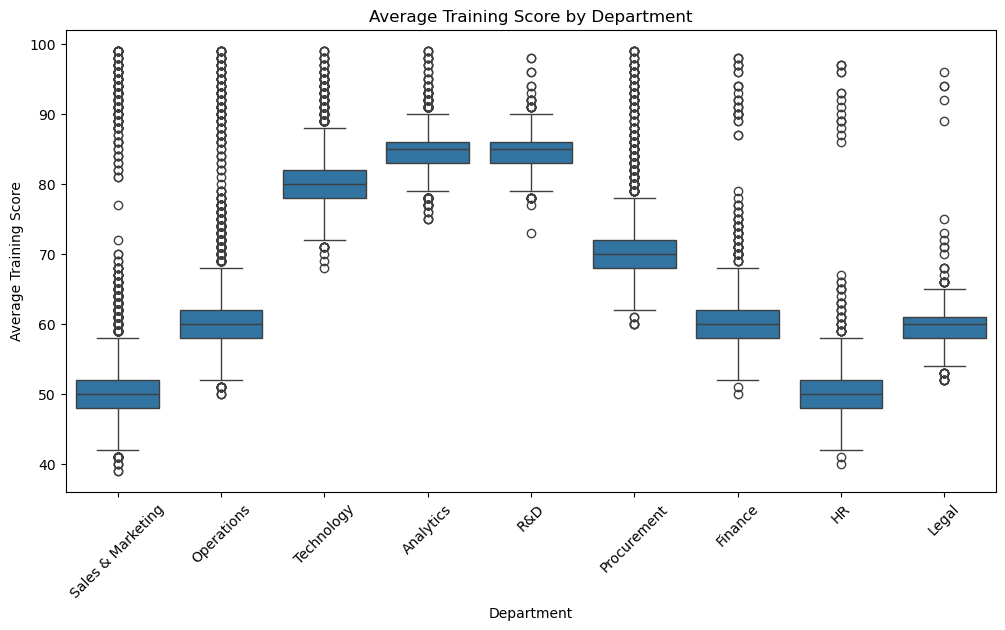

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='department', y='avg_training_score')
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()

The box plot of Average Training Score by Department shows distinct variations in training scores across departments. The Technology and Analytics departments have higher median training scores, generally between 80 and 90, while HR and Operations have lower medians around 60. Outliers are prevalent in all departments, indicating variability in scores within each category. Departments with higher average training scores, like Technology, might have more emphasis on training performance, while others, such as HR, show a wider range, possibly suggesting diverse training outcomes.

## c). Multivariate Analysis

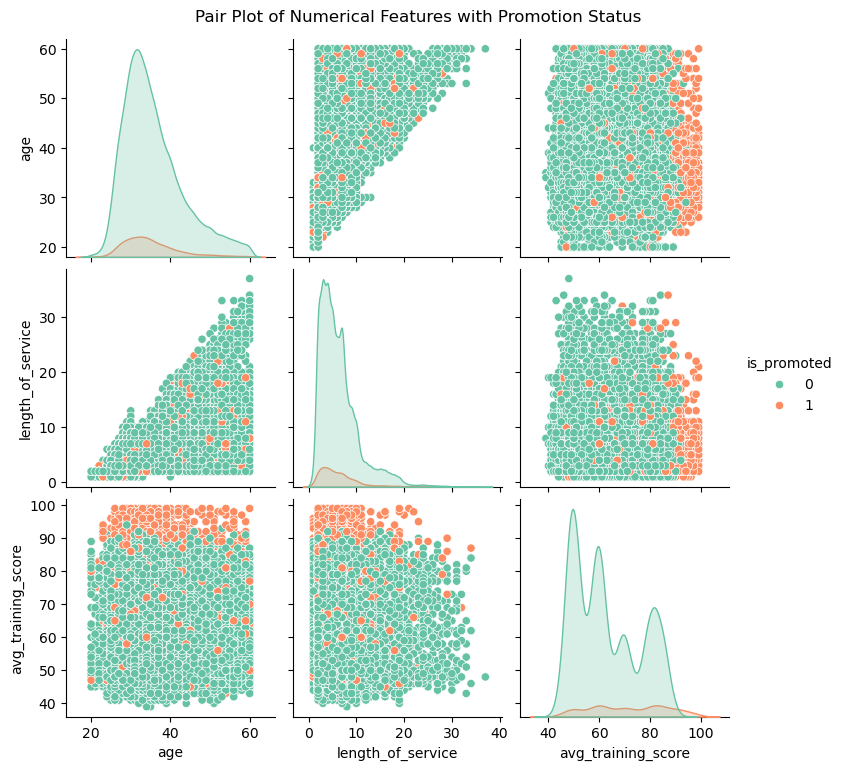

In [23]:
# Selecting relevant numerical columns and including 'is_promoted' as hue
sns.pairplot(train, vars=['age', 'length_of_service', 'avg_training_score'], hue='is_promoted', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features with Promotion Status', y=1.02)
plt.show()

The pair plot reveals several insights regarding promotion status across age, length of service, and average training score. There’s a strong positive correlation between age and length of service, as expected, with longer-serving employees generally being older. Average training score shows no significant correlation with either age or length of service, indicating that training scores are independent of an employee's age or tenure.

Regarding promotion, promoted employees (orange points) appear distributed similarly across the age and length of service ranges but are more concentrated in higher average training scores. This suggests that a higher training score might be an indicator of promotion potential, while age and tenure show less of an impact on promotion likelihood.

### Insights and Recommendations Based on EDA

- **Departmental Focus:**
  - The Technology department, with the highest promotion rate, might be leveraging effective talent development and career progression programs. Other departments could benefit from analyzing these strategies.
  - HR and Legal departments could review their promotion criteria and employee development programs to enhance career advancement opportunities.

- **Educational Attainment:**
  - Higher educational qualifications correlate with higher promotion rates, suggesting that advanced degrees might offer better career advancement opportunities.
  - Companies could incentivize further education or provide educational support to employees to enhance their career growth.

- **Performance Monitoring:**
  - Regularly track promotion rates across regions and age groups to identify and address any disparities, and use these insights to inform HR policies and ensure equitable promotion practices.

- **Employee Feedback:**
  - Collect feedback from employees in regions and age groups with lower promotion rates to understand their challenges, improve HR practices, and mitigate biases.


# Feature Engineering

New features are created based on identified patterns, such as combining training-related variables and regrouping sparse categories in department. These engineered features aim to improve the model’s ability to predict promotion potential effectively.

Feature engineering techniques used:
- Removing unnecessary columns
- Extracting features from categorical features
- Binning numerical and categorical features
- Aggregating multiple features together by using simple arithmetic operations

**1. Age Column - Creating Age Group Feature**

In [24]:
# Checking the count of unique values in the age column
train.age.value_counts()

age
32    3389
31    3268
30    3202
33    3106
34    2989
29    2731
35    2637
36    2451
28    2301
37    2117
27    2015
38    1875
39    1647
40    1616
26    1472
41    1254
42    1127
43     962
44     824
25     784
45     739
46     684
48     548
47     539
50     507
49     434
51     378
24     362
53     345
52     343
54     305
55     284
56     263
57     235
60     210
58     207
59     202
23     144
22      84
20      51
21      29
Name: count, dtype: int64

The `age` column has many unique values, which can make the model overly complex. By binning ages into broader groups, we reduce dimensionality and enable the model to capture general patterns related to employee age and promotion likelihood. This may help identify trends where certain age groups have a higher promotion rate.

In [25]:
# Define age group bins and labels
age_bins = [-1, 20, 30, 40, 50, 60, 70]
age_labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60']

# Create age group feature for both train and validation datasets
train['age_group'] = pd.cut(train['age'], bins=age_bins, labels=age_labels)
validation_df['age_group'] = pd.cut(validation_df['age'], bins=age_bins, labels=age_labels)

**2. Length of Service Column - Creating Service Group Feature**

In [26]:
#Checking the count of unique values in the length of service column
train.length_of_service.value_counts()

length_of_service
3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: count, dtype: int64

`length_of_service` also has a high number of unique values, which could complicate the model. By grouping values into categories, we capture general tenure patterns that might influence promotion decisions. For instance, employees with longer service might have a higher promotion likelihood due to experience and loyalty.

In [27]:
# Define service group bins and labels
service_bins = [-1, 2, 5, 10, 50]
service_labels = ['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years']

# Create service group feature for both train and validation datasets
train['service_group'] = pd.cut(train['length_of_service'], bins=service_bins, labels=service_labels)
validation_df['service_group'] = pd.cut(validation_df['length_of_service'], bins=service_bins, labels=service_labels)

**Average Training Score - Creating Score Group Feature**

The `avg_training_score` reflects training outcomes, but its many unique values make it less interpretable. By binning scores into performance levels (Low, Medium, High, Very High), the model can identify high-performing employees who might be more likely to receive a promotion.

In [28]:
# Creating the score_group feature for both train and validation dataframes
for df in [train, validation_df]:
    df['score_group'] = pd.cut(
        df['avg_training_score'], bins=[-0.1, 50, 60, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

The binning of avg_training_score is based on the score distribution and quartile values, creating categories that are easy to interpret and meaningful. These bins—Low (≤50), Medium (51-60), High (61-75), and Very High (>75)—align with performance levels, helping to identify employees’ training outcomes as underperforming, average, above-average, or top performers. This approach improves interpretability, reduces model complexity, and maintains consistency across data points.

**Performance Index Feature**

The `performance_index` combines multiple indicators of employee performance, such as `previous_year_rating`, `KPIs_met >80%`, and `awards_won?`. This composite feature provides a comprehensive view of an employee's performance, helping the model to prioritize higher-performing employees for promotion.
python

In [29]:
# List of DataFrames to iterate over
dataframes = [train, validation_df]

# Creating the performance_index feature using a for loop
for df in dataframes:
    df['performance_index'] = ((df['previous_year_rating'] / 5) * 0.4 +
                               df['KPIs_met >80%'] * 0.3 +
                               df['awards_won?'] * 0.3)

**Career Velocity Feature**

`career_velocity` captures the relationship between an employee’s `previous_year_rating` and `length_of_service`, indicating how quickly they have advanced. Higher `career_velocity` values may signify an employee who is excelling faster than peers with similar tenure, making them more likely candidates for promotion.

In [30]:
# Creating the career_velocity feature for both train and validation dataframes
for df in [train, validation_df]:
    df['career_velocity'] = df['previous_year_rating'] / (df['length_of_service'] + 1)

**Relative Experience Feature**

The `relative_experience` feature compares an employee's `age` to their `length_of_service`, providing insight into their experience relative to their career stage. Employees with high relative experience may bring valuable insights and skills that can influence promotion potential.

In [31]:
# Creating the relative_experience feature for both train and validation dataframes
for df in [train, validation_df]:
    df['relative_experience'] = df['age'] / (df['length_of_service'] + 1)


**Training Frequency Feature**

This feature captures the frequency of training sessions relative to `length_of_service`, reflecting an employee’s commitment to continuous learning. Higher training frequency may indicate an employee's dedication to development, positively impacting promotion decisions.

In [32]:
# List of DataFrames to iterate over
dataframes = [train, validation_df]

# Creating the training_frequency feature using a for loop
for df in dataframes:
    df['training_frequency'] = df['no_of_trainings'] / (df['length_of_service'] + 1)

**Training Effectiveness Feature**

`training_effectiveness` measures how well an employee applies training based on their scores and the number of training sessions taken. High effectiveness scores suggest that an employee is retaining and utilizing training, making them strong promotion candidates.

In [33]:
# List of DataFrames to iterate over
dataframes = [train, validation_df]

# Creating the training_effectiveness feature using a for loop
for df in dataframes:
    df['training_effectiveness'] = df['avg_training_score'] / (df['no_of_trainings'] + 1)

**Relative Performance Feature**

`relative_performance` standardizes each employee’s performance within their department, allowing the model to identify top performers relative to their peers. High relative performance indicates an employee who stands out within their department, signaling potential for promotion.

In [34]:
# Creating the relative_performance feature for both train and validation dataframes
for df in [train, validation_df]:
    df['relative_performance'] = df.groupby('department')['previous_year_rating'].transform(
        lambda x: (x - x.mean()) / x.std()
    )

**Consistent Performer Feature**

This feature identifies employees with consistent high ratings and KPI achievement. These employees demonstrate reliability, making them strong candidates for promotion, as they are consistently meeting or exceeding performance standards.

In [35]:
# Creating the consistent_performer feature for both train and validation dataframes
for df in [train, validation_df]:
    df['consistent_performer'] = ((df['previous_year_rating'] >= 4) & (df['KPIs_met >80%'] == 1)).astype(int)

## Dropping Redundant Columns
To avoid bias and simplify the model, certain columns are dropped. `Gender` and `region` are excluded to prevent bias, as these should not influence promotion decisions and may lead to unfair, discriminatory predictions. Additionally, columns like `employee_id`, `age`, `length_of_service`, and `avg_training_score` are removed to reduce multicollinearity and model complexity. Dropping these features—especially those that have been transformed or are not directly relevant—helps the model focus on meaningful predictors, leading to a fairer and more efficient promotion prediction model.

In [36]:
# Dropping columns for both train and validation dataframes
for df in [train, validation_df]:
    df.drop(columns=['employee_id', 'region', 'region_cleaned', 'gender', 'age', 'length_of_service', 'avg_training_score'], inplace=True)

In [37]:
train.dtypes

department                  object
education                   object
recruitment_channel         object
no_of_trainings              int64
previous_year_rating       float64
KPIs_met >80%                int64
awards_won?                  int64
is_promoted                  int64
age_group                 category
service_group             category
score_group               category
performance_index          float64
career_velocity            float64
relative_experience        float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
dtype: object

## Statistical test for feature relevance 

In [38]:
numerical_features = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 
                      'awards_won?', 'performance_index', 'career_velocity', 
                      'relative_experience', 'training_frequency', 
                      'training_effectiveness', 'relative_performance', 'consistent_performer']

# Store features with significant p-values
significant_numerical_features = []

# T-test for numerical features
for feature in numerical_features:
    promoted = train[train['is_promoted'] == 1][feature]
    not_promoted = train[train['is_promoted'] == 0][feature]
    t_stat, p = ttest_ind(promoted, not_promoted, nan_policy='omit')
    if p <= 0.05:
        significant_numerical_features.append(feature)
    else:
        print(f"Dropping {feature} - T-test p-value: {p}")

# Drop insignificant numerical features from the DataFrame
train = train.drop(columns=[feature for feature in numerical_features if feature not in significant_numerical_features])
print("Significant Numerical Features:", significant_numerical_features)

Dropping relative_experience - T-test p-value: 0.3927354022293703
Significant Numerical Features: ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'performance_index', 'career_velocity', 'training_frequency', 'training_effectiveness', 'relative_performance', 'consistent_performer']


In [39]:
validation_df = validation_df.drop(columns='relative_experience')

## Chi-square test for categorical features

In [40]:
# List of categorical features
categorical_features = ['department', 'education', 'recruitment_channel', 
                    'age_group', 'service_group', 'score_group']

# Store features with significant p-values
significant_categorical_features = []

# Chi-Square Test
for feature in categorical_features:
    contingency_table = pd.crosstab(train[feature], train['is_promoted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p <= 0.05:
        significant_categorical_features.append(feature)
    else:
        print(f"Dropping {feature} - Chi-Square Test p-value: {p}")

# Drop insignificant categorical features from the DataFrame
train = train.drop(columns=[feature for feature in categorical_features if feature not in significant_categorical_features])
print("Significant Categorical Features:", significant_categorical_features)

Significant Categorical Features: ['department', 'education', 'recruitment_channel', 'age_group', 'service_group', 'score_group']


In [41]:
# Combine significant categorical and numerical features
significant_features = significant_categorical_features + significant_numerical_features 

# Add 'is_promoted' to the list of significant features
significant_features.append('is_promoted')

# Create a DataFrame with all significant features
train = train[significant_features]

# Display the DataFrame with all significant features
train.dtypes

department                  object
education                   object
recruitment_channel         object
age_group                 category
service_group             category
score_group               category
no_of_trainings              int64
previous_year_rating       float64
KPIs_met >80%                int64
awards_won?                  int64
performance_index          float64
career_velocity            float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
is_promoted                  int64
dtype: object

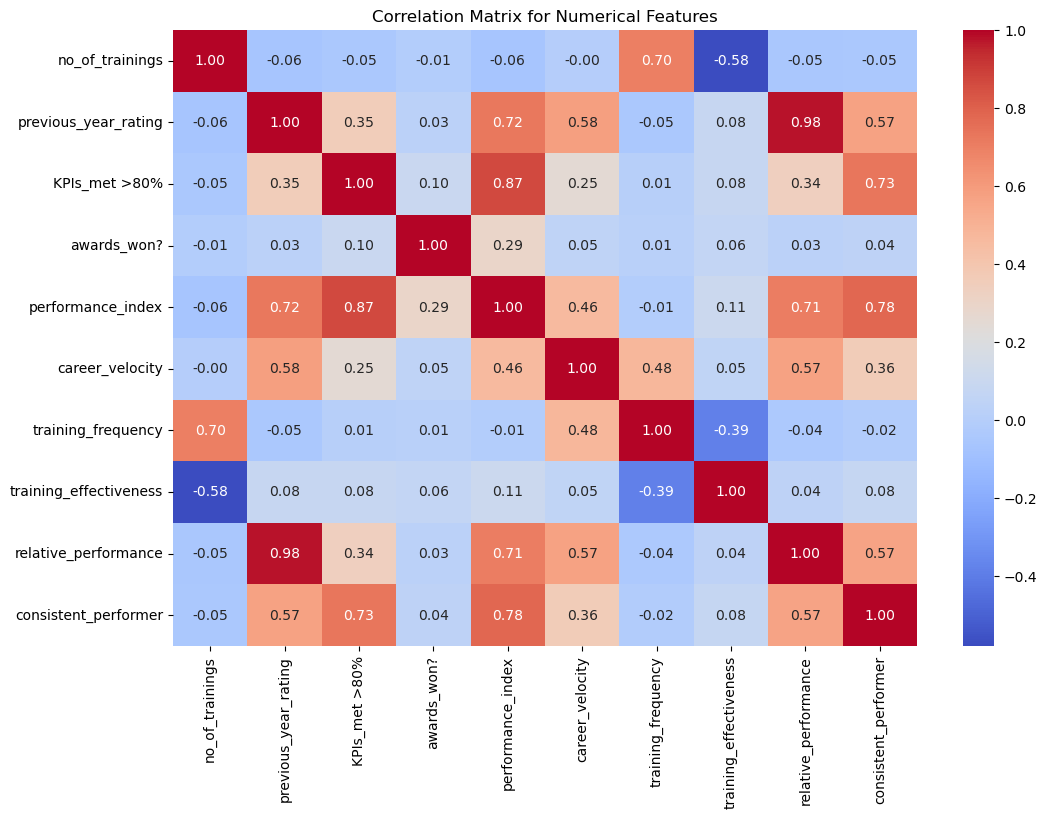

In [42]:
# Select only numerical features
numerical_features = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 
                      'awards_won?', 'performance_index', 'career_velocity', 
                      'training_frequency', 'training_effectiveness', 'relative_performance', 
                      'consistent_performer']

# Calculate correlation matrix for numerical features
correlation_matrix = train[numerical_features].corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

The correlation matrix reveals several instances of high correlation between features, indicating potential multicollinearity in the dataset. 

**Key Observations:**
- **`previous_year_rating` and `relative_performance`**: These features have a very high correlation (≈ 0.98), suggesting that they capture nearly identical information. Retaining both could introduce redundancy, so one of these features can be removed to simplify the model.
- **`KPIs_met >80%` and `performance_index`**: With a correlation of around 0.87, these two features are also highly correlated.
- **`performance_index` and `consistent_performer`**: There is a moderate correlation (≈ 0.78) between these features, which may indicate some overlap in the information they provide.

**Next Steps:**

To address multicollinearity, we will remove one feature from each highly correlated pair, prioritizing features that are more interpretable or directly relevant to the prediction task. 
This approach will help us build a more robust model by focusing on features that provide unique, non-redundant information.

In [43]:
# Define the features to drop based on correlation analysis
features_to_drop = ['no_of_trainings', 'previous_year_rating', 'performance_index']  # Add 'consistent_performer' if necessary

# Drop the selected features from the DataFrame
train = train.drop(columns=features_to_drop)
validation_df = validation_df.drop(columns=features_to_drop)

# Display the remaining columns to confirm
print("Remaining features after dropping highly correlated features:")
print(train.columns)

Remaining features after dropping highly correlated features:
Index(['department', 'education', 'recruitment_channel', 'age_group',
       'service_group', 'score_group', 'KPIs_met >80%', 'awards_won?',
       'career_velocity', 'training_frequency', 'training_effectiveness',
       'relative_performance', 'consistent_performer', 'is_promoted'],
      dtype='object')


### Calculating Variance Inflation Factor to Ensure Multicollinearity is reduced

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Update the DataFrame with the remaining features after dropping selected ones
selected_features = ['KPIs_met >80%', 
                      'awards_won?','career_velocity', 
                      'training_frequency', 'training_effectiveness','relative_performance',
                      'consistent_performer']  # Adjust based on the chosen drops

# Calculate VIF for each remaining feature
X = train[selected_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                  Feature       VIF
0           KPIs_met >80%  3.458095
1             awards_won?  1.037457
2         career_velocity  9.318934
3      training_frequency  4.440834
4  training_effectiveness  4.353348
5    relative_performance  2.393704
6    consistent_performer  3.729483


With the current set of features, all VIF values are within or close to the acceptable range (VIF < 10). We can proceed with these features in the model without concerns of multicollinearity. 

**Previewing the resultant dataframes**

In [45]:
train.head()

,department,education,recruitment_channel,age_group,service_group,score_group,KPIs_met >80%,awards_won?,career_velocity,training_frequency,training_effectiveness,relative_performance,consistent_performer,is_promoted
0,Sales & Marketing,Master's & above,sourcing,30-40,5-10 years,Low,1,0,0.555556,0.111111,24.500000,1.400532,1,0
1,Operations,Bachelor's,other,20-30,2-5 years,Medium,0,0,1.000000,0.200000,30.000000,1.176856,0,0
2,Sales & Marketing,Bachelor's,sourcing,30-40,5-10 years,Low,0,0,0.375000,0.125000,25.000000,-0.055899,0,0
3,Sales & Marketing,Bachelor's,other,30-40,5-10 years,Low,0,0,0.090909,0.181818,16.666667,-1.512329,0,0
4,Technology,Bachelor's,other,40-50,Less than 2 years,High,0,0,1.000000,0.333333,36.500000,-0.137837,0,0


In [46]:
validation_df.head()

,department,education,recruitment_channel,KPIs_met >80%,awards_won?,age_group,service_group,score_group,career_velocity,training_frequency,training_effectiveness,relative_performance,consistent_performer
1,HR,Bachelor's,other,0,0,30-40,2-5 years,Medium,0.5,0.166667,25.50,-0.436945,0
2,Sales & Marketing,Bachelor's,other,0,0,30-40,2-5 years,Low,0.2,0.200000,23.50,-1.512628,0
3,Procurement,Bachelor's,other,0,0,30-40,5-10 years,High,0.2,0.300000,16.25,-1.060383,0
4,Finance,Bachelor's,sourcing,0,0,20-30,5-10 years,High,0.5,0.125000,30.50,0.384213,0
5,Procurement,Bachelor's,sourcing,0,0,30-40,Less than 2 years,High,1.0,0.333333,34.00,-0.220938,0


# Data Preprocessing

## Encoding categoring variables

In [47]:
from sklearn.preprocessing import LabelEncoder

# Define the lists of nominal and ordinal features
nominal_features = ['department', 'recruitment_channel']
ordinal_features = ['age_group', 'service_group', 'score_group', 'education']

# Initialize LabelEncoder
le = LabelEncoder()

# Function to apply label encoding to both train and validation dataframes
def apply_label_encoding(df, nominal_features, ordinal_features):
    # Apply Label Encoding for Nominal Features
    for feature in nominal_features:
        df[feature] = le.fit_transform(df[feature])

    # Apply Label Encoding for Ordinal Features (with specified order)
    age_order = ['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60']
    service_order = ['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years']
    score_order = ['Low', 'Medium', 'High', 'Very High']
    education_order = ['Below Secondary', "Bachelor's", "Master's & above"]

    # Convert each ordinal feature to a categorical type with a specified order
    df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)
    df['service_group'] = pd.Categorical(df['service_group'], categories=service_order, ordered=True)
    df['score_group'] = pd.Categorical(df['score_group'], categories=score_order, ordered=True)
    df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

    # Apply Label Encoding for Ordinal Features
    for feature in ordinal_features:
        df[feature] = le.fit_transform(df[feature])

    return df

# Apply Label Encoding to both train and validation_df
train = apply_label_encoding(train, nominal_features, ordinal_features)
validation_df = apply_label_encoding(validation_df, nominal_features, ordinal_features)

# Check the DataFrame to confirm both encodings
train.head()

,department,education,recruitment_channel,age_group,service_group,score_group,KPIs_met >80%,awards_won?,career_velocity,training_frequency,training_effectiveness,relative_performance,consistent_performer,is_promoted
0,7,2,2,1,1,1,1,0,0.555556,0.111111,24.500000,1.400532,1,0
1,4,0,0,0,0,2,0,0,1.000000,0.200000,30.000000,1.176856,0,0
2,7,0,2,1,1,1,0,0,0.375000,0.125000,25.000000,-0.055899,0,0
3,7,0,0,1,1,1,0,0,0.090909,0.181818,16.666667,-1.512329,0,0
4,8,0,0,2,2,0,0,0,1.000000,0.333333,36.500000,-0.137837,0,0


# Splitting the data

In [48]:
# Split the predictor and target variables
X = train.drop('is_promoted', axis=1) #predictor
y = train['is_promoted'] #target 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Feature Selection**

Feature Importances:
                    Feature  Importance
10  training_effectiveness    0.367710
11    relative_performance    0.100032
0               department    0.089090
8          career_velocity    0.083957
9       training_frequency    0.081623
3                age_group    0.053404
2      recruitment_channel    0.046881
6            KPIs_met >80%    0.042673
5              score_group    0.039161
7              awards_won?    0.034192
1                education    0.030808
4            service_group    0.018216
12    consistent_performer    0.012252
Selected Features:
 ['training_effectiveness', 'relative_performance', 'department', 'career_velocity', 'training_frequency', 'age_group', 'recruitment_channel', 'KPIs_met >80%', 'score_group', 'awards_won?', 'education', 'service_group', 'consistent_performer']


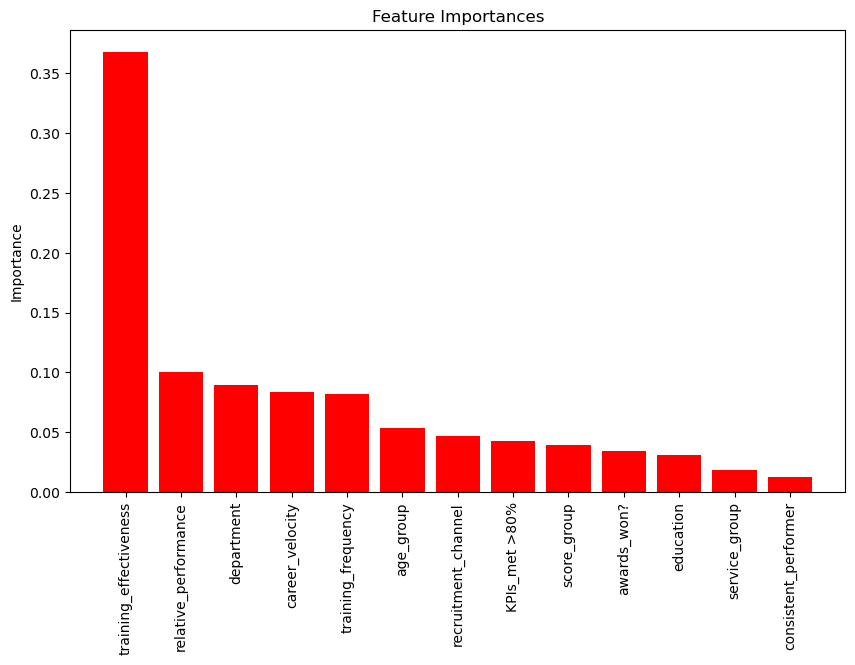

In [49]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n", feature_importance_df)

# Optional: Select features above a certain importance threshold
importance_threshold = 0.01  # Adjust this threshold based on your requirements
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

# Create new datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:\n", selected_features)

# Plotting the feature importances of the Random Forest model
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

# Sorting indices by feature importance for plotting
sorted_indices = np.argsort(importances)[::-1]
sorted_features = feature_importance_df['Feature'].iloc[sorted_indices].tolist()

# Ensure the plot only shows selected features
selected_indices = [sorted_features.index(feat) for feat in selected_features]
plt.bar(range(len(selected_features)), importances[sorted_indices][:len(selected_features)], color="r", align="center")
plt.xticks(range(len(selected_features)), [sorted_features[i] for i in selected_indices], rotation=90)
plt.xlim([-1, len(selected_features)])
plt.ylabel("Importance")
plt.show()

**Feature Importance Summary**

The most influential feature in predicting the target variable is `training_effectiveness` (0.362), followed by `department_freq_encoded` (0.110) and `relative_performance` (0.083). Moderate importance features include career_velocity and training_frequency. Lower importance features, such as consistent_performer and service_group, have minimal influence. 

*Selected Features*: All features with importance above 0.01 were retained for further analysis, focusing on the most impactful predictors to enhance model efficiency and interpretability.

# Balancing the Target Variable

In [50]:
!pip install -U imbalanced-learn

**ADASYN**

ADASYN (Adaptive Synthetic Sampling) is used to address class imbalance by creating synthetic samples for the minority class, especially in areas where data is sparse. This adaptive approach improves model performance by focusing on harder-to-classify instances, resulting in a more balanced dataset and better recall for the minority class. By enhancing representation of the minority class, ADASYN helps the model learn more effectively, reducing bias toward the majority class and improving overall classification performance.

In [51]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Step 1: Print original class distribution
print('Original class distribution:')
print(Counter(y_train))

# Step 2: Set up ADASYN with desired parameters
adasyn = ADASYN(sampling_strategy=0.3, n_neighbors=5)

# Step 3: Apply ADASYN to resample the training data
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_selected, y_train)

# Step 4: Check the new class distribution
print('-----------------------------------------')
print('Resampled class distribution (ADASYN):')
print(Counter(y_train_resampled))

Original class distribution:
Counter({0: 33350, 1: 3145})
-----------------------------------------
Resampled class distribution (ADASYN):
Counter({0: 33350, 1: 9795})


# Scaling the data

In [52]:
X_test_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12165 entries, 27936 to 25718
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   training_effectiveness  12165 non-null  float64
 1   relative_performance    12165 non-null  float64
 2   department              12165 non-null  int32  
 3   career_velocity         12165 non-null  float64
 4   training_frequency      12165 non-null  float64
 5   age_group               12165 non-null  int32  
 6   recruitment_channel     12165 non-null  int32  
 7   KPIs_met >80%           12165 non-null  int64  
 8   score_group             12165 non-null  int32  
 9   awards_won?             12165 non-null  int64  
 10  education               12165 non-null  int32  
 11  service_group           12165 non-null  int32  
 12  consistent_performer    12165 non-null  int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 997.9 KB


In [53]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20819 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              20819 non-null  int32  
 1   education               20819 non-null  int32  
 2   recruitment_channel     20819 non-null  int32  
 3   KPIs_met >80%           20819 non-null  int64  
 4   awards_won?             20819 non-null  int64  
 5   age_group               20819 non-null  int32  
 6   service_group           20819 non-null  int32  
 7   score_group             20819 non-null  int32  
 8   career_velocity         20819 non-null  float64
 9   training_frequency      20819 non-null  float64
 10  training_effectiveness  20819 non-null  float64
 11  relative_performance    20819 non-null  float64
 12  consistent_performer    20819 non-null  int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 1.7 MB


In [54]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test_selected)

# Ensure validation_df columns are in the same order as X_train_resampled
# Reorder the validation columns to match the training data
validation_df_aligned = validation_df[X_train_resampled.columns]

# Transform the validation dataset using the same scaler
validation_scaled = scaler.transform(validation_df_aligned)

# Convert the scaled arrays into DataFrames with the correct column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_selected.columns)
validation_scaled_df = pd.DataFrame(validation_scaled, columns=X_train_resampled.columns)

# Modelling

In this section, multiple models, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and XGB are trained with tuned hyperparameters. Cross-validation is used to identify the best-performing model based on predictive accuracy and generalizability.

In [55]:
# Modified function to return results as a dictionary
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Instantiate models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Evaluate each model and collect results
results = []
for model in [log_reg_model, dt_model, rf_model, gb_model, xgb_model, svm_model]:
    result = evaluate_model(model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,LogisticRegression,0.877846,0.298688,0.272309,0.284889,"[[10383, 695], [791, 296]]"
1,DecisionTreeClassifier,0.896835,0.421348,0.413983,0.417633,"[[10460, 618], [637, 450]]"
2,RandomForestClassifier,0.911303,0.505102,0.364305,0.423303,"[[10690, 388], [691, 396]]"
3,GradientBoostingClassifier,0.923140,0.781481,0.194112,0.310980,"[[11019, 59], [876, 211]]"
4,XGBClassifier,0.931114,0.746535,0.346826,0.473618,"[[10950, 128], [710, 377]]"
5,SVC,0.693136,0.204159,0.839926,0.328476,"[[7519, 3559], [174, 913]]"


**Interpretation**


- **Best Balance**: XGBoost Classifier, with an F1 Score of 0.480659, offers the best balance between Precision and Recall. This model is effective at identifying promotable employees while minimizing errors.
- **High Precision**: Gradient Boosting Classifier is highly precise, making it ideal if our main concern was to ensure that only the most eligible employees are promoted.
- **High Recall**: Support Vector Classifier (SVC) excels at Recall, capturing most promotable employees but at the risk of many false positives.

In a real-world HR scenario, **XGBoost** would be the best model for balancing both accuracy and fairness in promotion recommendations, as it minimizes the chance of missing promotable employees while also reducing the likelihood of promoting ineligible ones.

Hyperparameter tuning is done to try and improve the models scores.

## Hyperparameter Tuning

### Finding the best Parameters

**GridSearchCV for XGBClassifier**

In [56]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from collections import Counter

# Calculate scale_pos_weight based on class imbalance
class_counts = Counter(y_train_resampled)
scale_pos_weight = class_counts[0] / class_counts[1]  # Assuming 0 is the majority and 1 is the minority class

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight]  # Adjust for class imbalance
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1}
Best F1 Score for XGBoost: 0.7622403896555318


Since the primary goal was to optimize the model for an imbalanced dataset, the scale_pos_weight parameter was calculated as the ratio of majority to minority class instances.

A parameter grid was defined for tuning *n_estimators*, *max_depth*, *learning_rate*, and *scale_pos_weight*. The **GridSearchCV** was used to evaluate all possible combinations of these hyperparameters with 3-fold cross-validation, optimizing for the F1 score to address class imbalance.

The best combination of hyperparameters found was:

- learning_rate: 0.2
- max_depth: 7
- n_estimators: 300
- scale_pos_weight: 1

**RandomizedSearchCV for RandomForestClassifier**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, scoring='f1', cv=3, verbose=1, n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best F1 Score for Random Forest:", random_search_rf.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
Best F1 Score for Random Forest: 0.7383188326098614


**Best parameters for GradientBoostingClassifier**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform randomized search
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb, scoring='f1', cv=3, verbose=1, n_jobs=-1, n_iter=20, random_state=42)
random_search_gb.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best F1 Score for Gradient Boosting:", random_search_gb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 288, 'subsample': 0.6}
Best F1 Score for Gradient Boosting: 0.7474493380513337


### Hyperparameter Tuning of the XGB, GradientBoosting and RandomForestClassifier

In [59]:
# Tuning models with the best parameters 
tuned_models = [
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, 
                          n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1)),
    ('RandomForest', RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20, 
                                            min_samples_split=5, min_samples_leaf=2, max_features='sqrt')),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                                    learning_rate=0.1, subsample=1.0))
]

# Initialize list to store results for this cell
cell_results = []

# Evaluate each tuned model and collect results
for model_name, model in tuned_models:
    metrics = evaluate_model(model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
    metrics['Model'] = model_name
    metrics['Best Parameters'] = model.get_params()  # Add parameters used
    cell_results.append(metrics)

# Convert the results of these 3 models to a temporary DataFrame
cell_results_df = pd.DataFrame(cell_results)

# Display the updated final results DataFrame
cell_results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,XGB,0.927908,0.676174,0.370745,0.478907,"[[10885, 193], [684, 403]]","{'objective': 'binary:logistic', 'base_score':..."
1,RandomForest,0.925853,0.663139,0.345906,0.454655,"[[10887, 191], [711, 376]]","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,GradientBoosting,0.931114,0.732710,0.360626,0.483354,"[[10935, 143], [695, 392]]","{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."


# Model ensemble

**XGB, GradientBoosting and RandomForestClassifier**

In [61]:
from sklearn.ensemble import StackingClassifier
level_1_estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                          n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1)),
    ('gb', GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                      learning_rate=0.1, subsample=1.0))
]

# Choose Random Forest with best parameters as the final estimator (meta-learner)
final_estimator = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20, 
                                         min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=level_1_estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Define evaluation function to match desired output format
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Evaluate the stacking model and store results in the required format
stacking_metrics = evaluate_model(stacking_model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

# Convert stacking model results to a DataFrame for display
stacking_results_df = pd.DataFrame([stacking_metrics])

# Display the stacking model results DataFrame
stacking_results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,StackingClassifier,0.928237,0.691071,0.356026,0.469945,"[[10905, 173], [700, 387]]"


**RandomForest,GradientBoosting, XGBClassifier & LogisticRegression**

In [62]:
# Initialize the models with their best parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                    n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1)

gb = GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                learning_rate=0.1, subsample=1.0)

# Fit both models to the training data
xgb.fit(X_train_scaled, y_train_resampled)
gb.fit(X_train_scaled, y_train_resampled)

# Define a function to combine predictions by averaging probabilities
def blended_predict(X_test, threshold=0.4):
    # Get predicted probabilities from each model
    xgb_probs = xgb.predict_proba(X_test)[:, 1]
    gb_probs = gb.predict_proba(X_test)[:, 1]
    
    # Average the probabilities
    avg_probs = (xgb_probs + gb_probs) / 2
    
    # Apply the threshold
    blended_preds = (avg_probs >= threshold).astype(int)
    return blended_preds

# Define evaluation function in the required format
def evaluate_model(y_test, y_pred, model_name="Blended Model"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Make blended predictions and evaluate
blended_preds = blended_predict(X_test_scaled, threshold=0.4)
blended_metrics = evaluate_model(y_test, blended_preds, model_name="Blended Model")

# Convert blended model results to a DataFrame
blended_results_df = pd.DataFrame([blended_metrics])

# Display the blended model results DataFrame
blended_results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Blended Model,0.923469,0.610169,0.397424,0.481337,"[[10802, 276], [655, 432]]"


### Weighted Models

**LGBMClassifier**

In [63]:
# Import LightGBM
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Initialize LightGBM with imbalance parameter
lgbm_model = LGBMClassifier(is_unbalance=True, random_state=42)
lgbm_model.fit(X_train_scaled, y_train_resampled)

# Define evaluation function in the required format
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Evaluate the LightGBM model and store results in the required format
lgbm_metrics = evaluate_model(lgbm_model, X_test_scaled, y_test)

# Convert LightGBM model results to a DataFrame
lgbm_results_df = pd.DataFrame([lgbm_metrics])

# Display the LightGBM model results DataFrame
lgbm_results_df

[LightGBM] [Info] Number of positive: 9795, number of negative: 33350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 43145, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227025 -> initscore=-1.225186
[LightGBM] [Info] Start training from score -1.225186


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,LGBMClassifier,0.851377,0.333947,0.666973,0.445058,"[[9632, 1446], [362, 725]]"


**Finding Best Parameters for LGBMClassifier**

In [64]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the LightGBM model with the imbalance parameter
lgbm_model = LGBMClassifier(is_unbalance=True, random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50, 60],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Set up RandomizedSearchCV with F1 score as the evaluation metric
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring=make_scorer(f1_score, average='weighted'),  # Optimize for weighted F1 score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 9795, number of negative: 33350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 43145, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227025 -> initscore=-1.225186
[LightGBM] [Info] Start training from score -1.225186
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'num_leaves': 40, 'n_estimators': 1000, 'min_child_samples': 10, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best F1 Score: 0.9124954961707636


In [65]:
# Define the function to evaluate the model with additional metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')        # 'weighted' for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')                # 'weighted' for multi-class
    cm = confusion_matrix(y_test, y_pred)
    
    # Return all metrics in a dictionary
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Initialize LightGBM with the best parameters and imbalance parameter
Lgbm_Tuned_model = LGBMClassifier(
    is_unbalance=True,
    subsample=1.0,
    reg_lambda=1.0,
    reg_alpha=0.1,
    num_leaves=40,
    n_estimators=1000,
    min_child_samples=10,
    max_depth=15,
    learning_rate=0.2,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model on the resampled training data
Lgbm_Tuned_model.fit(X_train_scaled, y_train_resampled)

# Evaluate the model on the test set
metrics = evaluate_model(Lgbm_Tuned_model, X_test_scaled, y_test)

# Append model name and parameters to metrics
metrics['Model'] = 'LightGBM_Tuned'
metrics['Best Parameters'] = Lgbm_Tuned_model.get_params()

# Convert results to a DataFrame, including the confusion matrix as a formatted string for readability
Lgbm_Tuned_df = pd.DataFrame([{
    'Model': metrics['Model'],
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1 Score': metrics['F1 Score'],
    'Confusion Matrix': str(metrics['Confusion Matrix']),  # Convert confusion matrix to string for readability
    'Best Parameters': metrics['Best Parameters']
}])

# Display the results
Lgbm_Tuned_df

[LightGBM] [Info] Number of positive: 9795, number of negative: 33350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 43145, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227025 -> initscore=-1.225186
[LightGBM] [Info] Start training from score -1.225186


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,LightGBM_Tuned,0.900534,0.901936,0.900534,0.901224,[[10456 622]\n [ 588 499]],"{'boosting_type': 'gbdt', 'class_weight': None..."


In [69]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize BalancedBagging with DecisionTree base estimator
balanced_bagging_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

# Train the model on the resampled training data
balanced_bagging_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and calculate metrics
y_pred_balanced_bagging = balanced_bagging_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_balanced_bagging)
precision = precision_score(y_test, y_pred_balanced_bagging)  # Default average for binary classification
recall = recall_score(y_test, y_pred_balanced_bagging)        # Default average for binary classification
f1 = f1_score(y_test, y_pred_balanced_bagging)                # Default average for binary classification
conf_matrix = confusion_matrix(y_test, y_pred_balanced_bagging)

# Prepare results as a dictionary to convert to a DataFrame
balanced_bagging_metrics = {
    'Model': 'Balanced Bagging',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': str(conf_matrix)  # Convert confusion matrix to string for readability
}

# Convert results to a DataFrame
balanced_bagging_df = pd.DataFrame([balanced_bagging_metrics])

# Display the results
balanced_bagging_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Balanced Bagging,0.881134,0.374738,0.49402,0.42619,[[10182 896]\n [ 550 537]]


In [70]:
# Initialize BalancedBaggingClassifier with DecisionTree base estimator
balanced_bagging_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 10, 20, 30],  # Depth of decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples for splitting a node
    'estimator__min_samples_leaf': [1, 2, 4]     # Minimum samples at a leaf node
}

# Set up RandomizedSearchCV with F1 score as the evaluation metric
random_search = RandomizedSearchCV(
    estimator=balanced_bagging_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring=make_scorer(f1_score, average='weighted'),  # Optimizing for weighted F1 score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.7, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 30, 'bootstrap_features': False, 'bootstrap': True}
Best F1 Score: 0.9036294312322859


In [71]:
# Initialize BalancedBaggingClassifier with DecisionTree base estimator and best parameters
balanced_bagging_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    n_estimators=200,
    max_samples=1.0,
    max_features=0.7,
    bootstrap=True,
    bootstrap_features=False,
    random_state=42
)

# Train the model on the resampled training data
balanced_bagging_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_balanced_bagging = balanced_bagging_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_balanced_bagging)
precision = precision_score(y_test, y_pred_balanced_bagging, average='weighted')
recall = recall_score(y_test, y_pred_balanced_bagging, average='weighted')
f1 = f1_score(y_test, y_pred_balanced_bagging, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_balanced_bagging)

# Prepare results as a DataFrame with formatted values
balanced_bagging_tuned = {
    'Model': 'Balanced Bagging Tuned',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': str(conf_matrix),  # Convert confusion matrix to string for readability
    'Best Parameters': balanced_bagging_model.get_params()  # Directly store parameters as a dictionary
}

# Convert results to a DataFrame
balanced_bagging_tuned_df = pd.DataFrame([balanced_bagging_tuned])

balanced_bagging_tuned_df


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,Balanced Bagging Tuned,0.895849,0.902324,0.895849,0.898874,[[10369 709]\n [ 558 529]],"{'bootstrap': True, 'bootstrap_features': Fals..."


**XGBClassifier with scale_pos_weight**

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Adjust the scale_pos_weight parameter for imbalance handling
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Initialize XGBClassifier with the adjusted scale_pos_weight parameter
xgb_weighted_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Train the model on the resampled training data
xgb_weighted_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and calculate metrics
y_pred_xgb_weighted = xgb_weighted_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_xgb_weighted)
precision = precision_score(y_test, y_pred_xgb_weighted)  # Default for binary classification
recall = recall_score(y_test, y_pred_xgb_weighted)        # Default for binary classification
f1 = f1_score(y_test, y_pred_xgb_weighted)                # Default for binary classification
conf_matrix = confusion_matrix(y_test, y_pred_xgb_weighted)

# Prepare results as a dictionary to convert to a DataFrame
xgb_weighted_metrics = {
    'Model': 'XGBoost (Weighted)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': str(conf_matrix)  # Convert confusion matrix to string for readability
}

# Convert results to a DataFrame
xgb_weighted_df = pd.DataFrame([xgb_weighted_metrics])

# Display the results
xgb_weighted_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,XGBoost (Weighted),0.86009,0.33976,0.599816,0.433799,[[9811 1267]\n [ 435 652]]


In [73]:
# Adjust the scale_pos_weight parameter for imbalance handling
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Initialize XGBClassifier with initial parameters and scale_pos_weight
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 1.5, 2, 3]
}

# Set up RandomizedSearchCV with F1 score as the evaluation metric
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring=make_scorer(f1_score, average='weighted'),  # Optimizing for weighted F1 score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 Score: 0.9096945359037687


In [74]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Adjust the scale_pos_weight parameter for imbalance handling
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Initialize XGBClassifier with the best parameters and scale_pos_weight
xgb_weighted_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    subsample=0.8,
    reg_lambda=3,
    reg_alpha=0.1,
    n_estimators=1000,
    min_child_weight=1,
    max_depth=15,
    learning_rate=0.2,
    gamma=0.1,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model on the resampled training data
xgb_weighted_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb_weighted = xgb_weighted_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb_weighted)
precision = precision_score(y_test, y_pred_xgb_weighted, average='weighted')
recall = recall_score(y_test, y_pred_xgb_weighted, average='weighted')
f1 = f1_score(y_test, y_pred_xgb_weighted, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_xgb_weighted)

# Prepare results as a dictionary to convert to a DataFrame
xgb_weighted_metrics = {
    'Model': 'XGB (Weighted_Tuned)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': str(conf_matrix),  # Convert confusion matrix to string for readability
    'Best Parameters': xgb_weighted_model.get_params()  # Directly store parameters as a dictionary
}

# Convert results to a DataFrame
XGB_Weighted_Tuned = pd.DataFrame([xgb_weighted_metrics])

# Display the results
XGB_Weighted_Tuned


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,XGB (Weighted_Tuned),0.892314,0.897271,0.892314,0.894678,[[10367 711]\n [ 599 488]],"{'objective': 'binary:logistic', 'base_score':..."


**Neural Network**

In [75]:
from sklearn.neural_network import MLPClassifier
# Initialize Multi-layer Perceptron Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)

# Train the model on the resampled training data
nn_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and calculate metrics
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)  # Default for binary classification
recall = recall_score(y_test, y_pred_nn)        # Default for binary classification
f1 = f1_score(y_test, y_pred_nn)                # Default for binary classification
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Prepare results as a dictionary to convert to a DataFrame
nn_metrics = {
    'Model': 'Neural Network (MLP)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': str(conf_matrix),  # Convert confusion matrix to string for readability
    'Best Parameters': nn_model.get_params()  # Include parameters for reference
}

# Convert results to a DataFrame
nn_df = pd.DataFrame([nn_metrics])

# Display the results
nn_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,Neural Network (MLP),0.880477,0.366156,0.461822,0.408462,[[10209 869]\n [ 585 502]],"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


In [ ]:
# Model Selection

In [76]:
# List all DataFrames to be merged
dfs_to_merge = [
    results_df,
    cell_results_df,
    stacking_results_df,
    blended_results_df,
    lgbm_results_df,
    Lgbm_Tuned_df,
    balanced_bagging_df,
    balanced_bagging_tuned_df,
    xgb_weighted_df,
    XGB_Weighted_Tuned,
    nn_df
]

# Concatenate all DataFrames into a single DataFrame
all_results_df = pd.concat(dfs_to_merge, ignore_index=True)

# Display the merged DataFrame
all_results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Best Parameters
0,LogisticRegression,0.877846,0.298688,0.272309,0.284889,"[[10383, 695], [791, 296]]",NaN
1,DecisionTreeClassifier,0.896835,0.421348,0.413983,0.417633,"[[10460, 618], [637, 450]]",NaN
2,RandomForestClassifier,0.911303,0.505102,0.364305,0.423303,"[[10690, 388], [691, 396]]",NaN
3,GradientBoostingClassifier,0.923140,0.781481,0.194112,0.310980,"[[11019, 59], [876, 211]]",NaN
4,XGBClassifier,0.931114,0.746535,0.346826,0.473618,"[[10950, 128], [710, 377]]",NaN
5,SVC,0.693136,0.204159,0.839926,0.328476,"[[7519, 3559], [174, 913]]",NaN
6,XGB,0.927908,0.676174,0.370745,0.478907,"[[10885, 193], [684, 403]]","{'objective': 'binary:logistic', 'base_score':..."
7,RandomForest,0.925853,0.663139,0.345906,0.454655,"[[10887, 191], [711, 376]]","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
8,GradientBoosting,0.931114,0.732710,0.360626,0.483354,"[[10935, 143], [695, 392]]","{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
9,StackingClassifier,0.928237,0.691071,0.356026,0.469945,"[[10905, 173], [700, 387]]",NaN


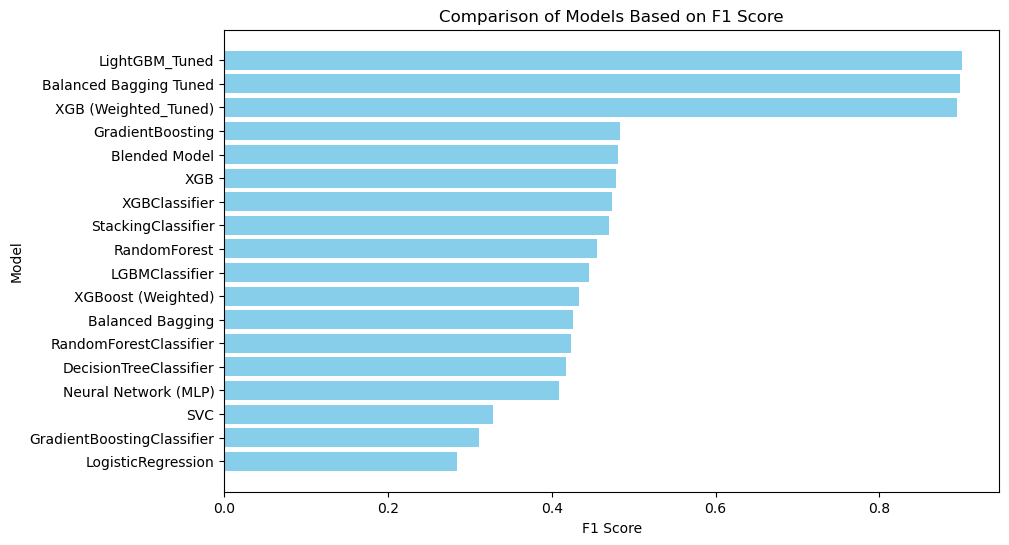

In [79]:
# Sort the DataFrame by F1 Score for better visual comparison
all_results_df_sorted = all_results_df.sort_values(by='F1 Score', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(all_results_df_sorted['Model'], all_results_df_sorted['F1 Score'], color='skyblue')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('Comparison of Models Based on F1 Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest F1 score at the top
plt.show()

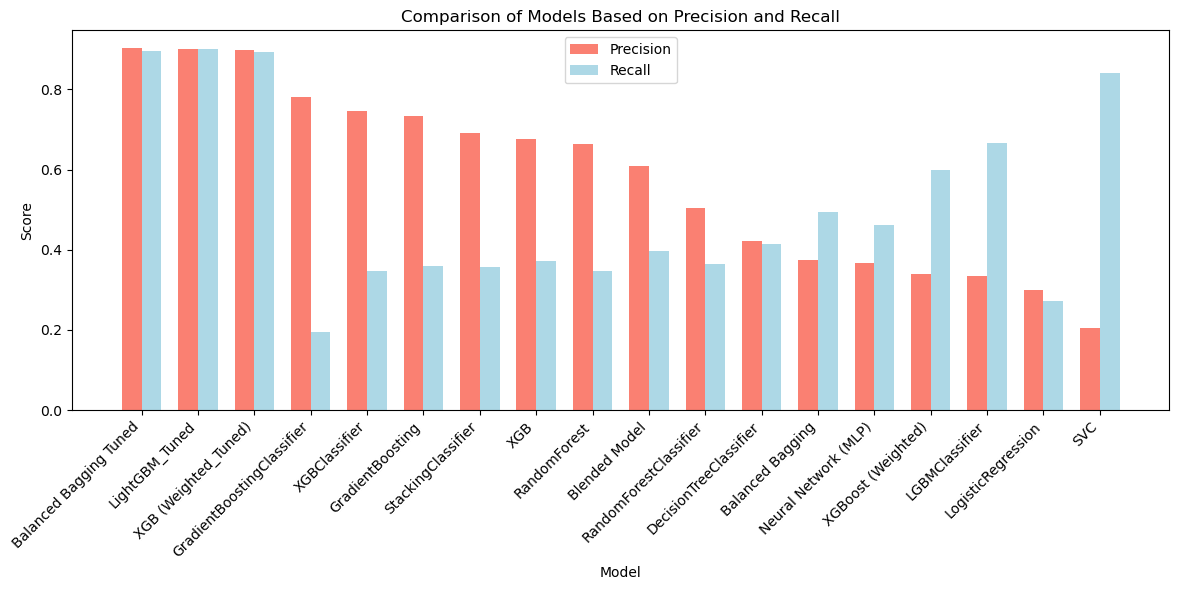

In [80]:
# Sort the DataFrame by Precision for better visual comparison
all_results_df_sorted = all_results_df.sort_values(by='Precision', ascending=False)

# Set the position of the bars on the x-axis
x = np.arange(len(all_results_df_sorted['Model']))

# Set the width of the bars
width = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
precision_bars = ax.bar(x - width/2, all_results_df_sorted['Precision'], width, label='Precision', color='salmon')
recall_bars = ax.bar(x + width/2, all_results_df_sorted['Recall'], width, label='Recall', color='lightblue')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Based on Precision and Recall')
ax.set_xticks(x)
ax.set_xticklabels(all_results_df_sorted['Model'], rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

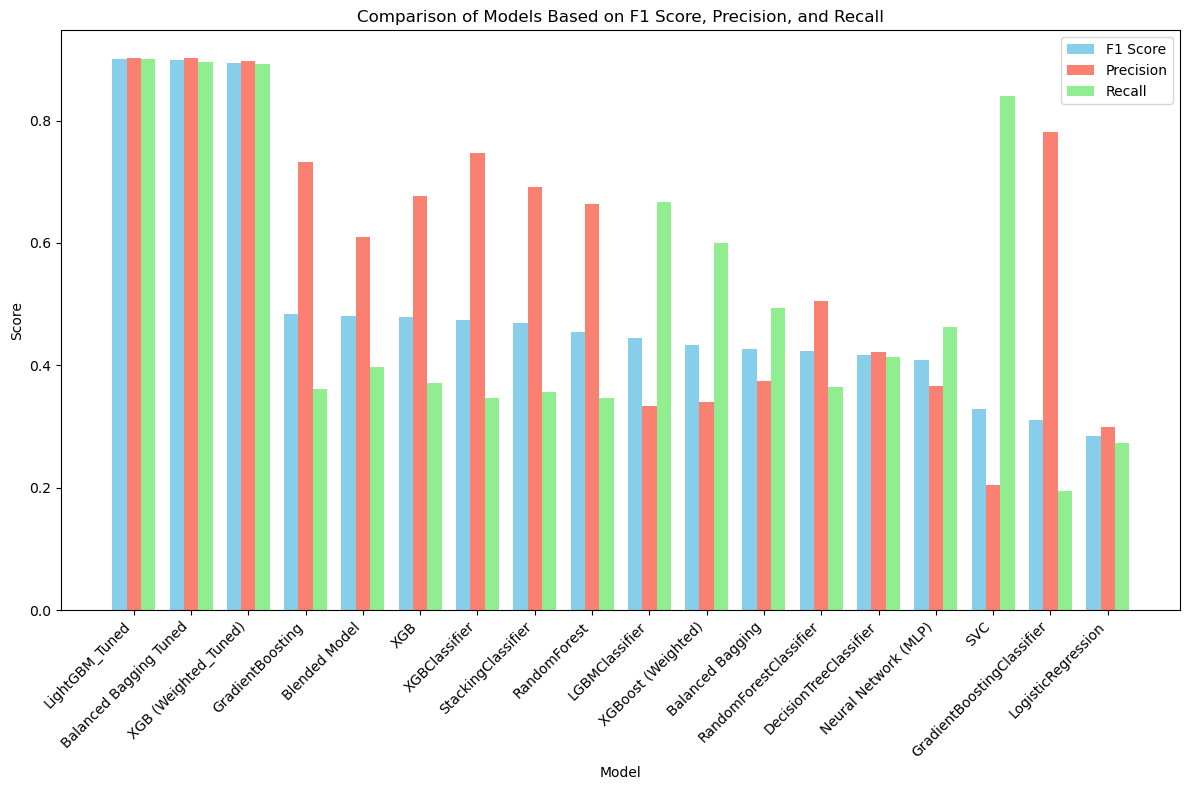

In [83]:
# Sort the DataFrame by F1 Score for better visual comparison
all_results_df_sorted = all_results_df.sort_values(by='F1 Score', ascending=False)

# Set up positions for each model and bar width
x = np.arange(len(all_results_df_sorted['Model']))  # X locations for the groups
width = 0.25  # Width of each bar

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
f1_bars = ax.bar(x - width, all_results_df_sorted['F1 Score'], width, label='F1 Score', color='skyblue')
precision_bars = ax.bar(x, all_results_df_sorted['Precision'], width, label='Precision', color='salmon')
recall_bars = ax.bar(x + width, all_results_df_sorted['Recall'], width, label='Recall', color='lightgreen')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Based on F1 Score, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(all_results_df_sorted['Model'], rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

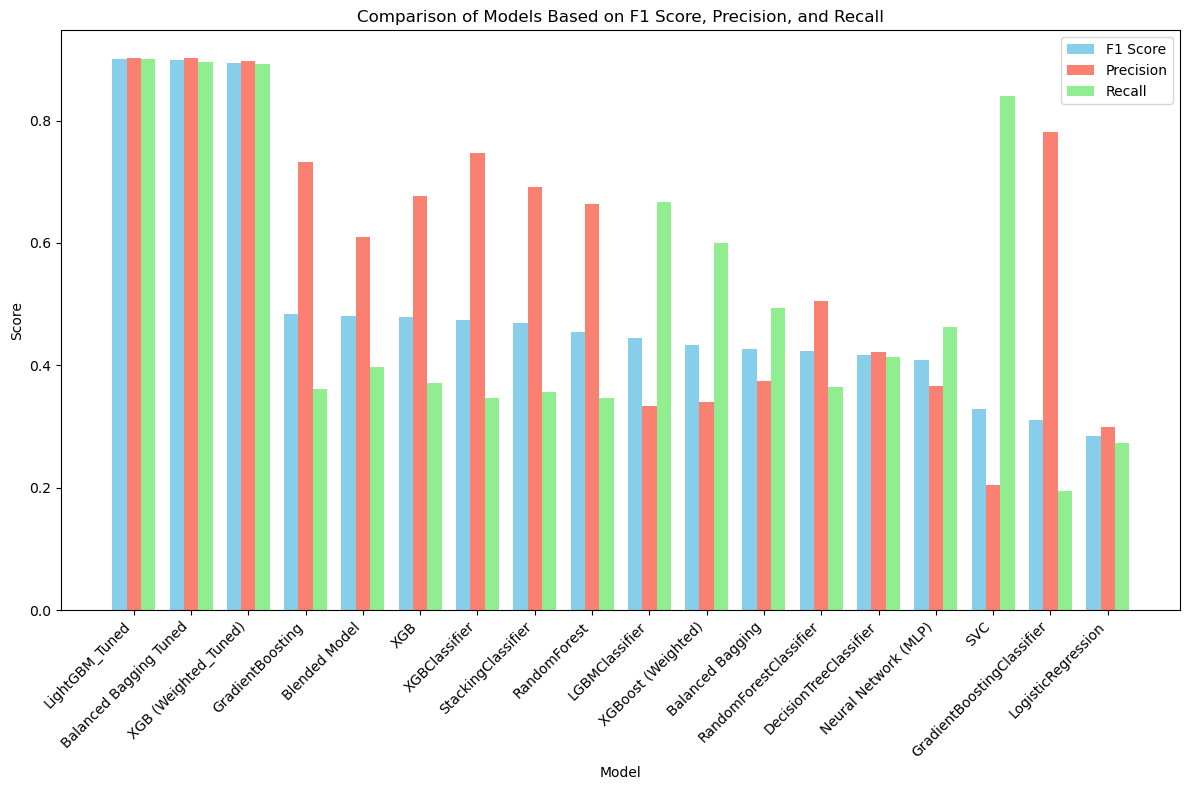

In [85]:
# Sort the DataFrame by F1 Score for better visual comparison
all_results_df_sorted = all_results_df.sort_values(by='F1 Score', ascending=False)

# Set up positions for each model and bar width
x = np.arange(len(all_results_df_sorted['Model']))  # X locations for the groups
width = 0.25  # Width of each bar

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
f1_bars = ax.bar(x - width, all_results_df_sorted['F1 Score'], width, label='F1 Score', color='skyblue')
precision_bars = ax.bar(x, all_results_df_sorted['Precision'], width, label='Precision', color='salmon')
recall_bars = ax.bar(x + width, all_results_df_sorted['Recall'], width, label='Recall', color='lightgreen')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Based on F1 Score, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(all_results_df_sorted['Model'], rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()

plt.show()

### Deployment

In [81]:
import pickle
# Save the model to a file using pickle
with open("Lgbm_Tuned_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


In [82]:
# Load the model
with open("Lgbm_Tuned_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_scaled)

print(predictions)

[0 0 0 ... 0 0 0]
